In [75]:
import pandas as pd
import numpy as np

In [76]:
from random import randrange
import time

In [77]:
from numpy import percentile
from numpy import sqrt, random, array, argsort


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [81]:
import os
import sys
from time import time

In [82]:
csv_file_path = 'cloudtrail.csv'

In [83]:
pd.set_option('display.max_rows', 200)

In [84]:
### TBD Check ifwe need all fields

In [85]:
fields_to_encode = [ 'source', 'service', 'action', 'agent', 'arn', 'tactic1','tactic2'] # remove time

In [86]:
fields_to_encode = [ 'source', 'service', 'action', 'agent', 'arn', 'tactic1','tactic2'] # remove time

In [87]:
# Select the columns you want to use for outlier detection
#columns_for_outliers = [ 'source', 'service',  'action', 'agent', 'arn','tactic1','tactic2'] # remove time

In [88]:
# Select the columns you want to use for outlier detection
columns_for_outliers = [ 'source', 'service',  'action', 'agent', 'arn'] # remove time

In [89]:
# Read the CSV file and extract relevant fields
df = pd.read_csv(csv_file_path, encoding='utf-8')  # Adjust the encoding if needed

In [90]:
df.dtypes

time       object
source     object
service    object
action     object
agent      object
arn        object
tactic1    object
tactic2    object
dtype: object

In [91]:
sum_n_unique = 0
for field in fields_to_encode:
    print(field)
    print(df[field].nunique())
    sum_n_unique += df[field].nunique()
    print(df[field].value_counts())
    print("==============")

source
48
source
vpc-flow-logs.amazonaws.com    21730
198.18.161.170                  3028
203.0.113.55                     141
72.21.217.49                      93
72.21.217.97                      55
198.18.14.103                     52
72.21.217.83                      38
72.21.217.73                      38
223.0.113.35                      36
72.21.217.117                     36
72.21.217.152                     36
72.21.217.47                      36
72.21.217.118                     36
72.21.217.109                     19
72.21.217.21                      19
72.21.217.223                     19
72.21.217.107                     19
72.21.217.129                     19
72.21.217.45                      19
72.21.217.70                      19
72.21.217.140                     19
72.21.217.71                      19
72.21.217.133                     19
72.21.217.75                      19
72.21.217.153                     19
72.21.217.85                      17
72.21.217.78         

In [92]:
print(sum_n_unique)

186


In [93]:
for field in fields_to_encode:
    print(field)
    print(df[field].value_counts().describe())
    print("==============")

source
count       48.000000
mean       534.916667
std       3154.450809
min          1.000000
25%          1.000000
50%         19.000000
75%         36.000000
max      21730.000000
Name: count, dtype: float64
service
count       20.000000
mean      1283.800000
std       4872.843962
min          1.000000
25%         15.250000
50%         20.000000
75%         36.500000
max      21749.000000
Name: count, dtype: float64
action
count       76.000000
mean       337.842105
std       2489.075818
min          1.000000
25%          3.000000
50%          9.500000
75%         37.500000
max      21730.000000
Name: count, dtype: float64
agent
count       29.000000
mean       885.379310
std       4052.179999
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max      21730.000000
Name: count, dtype: float64
arn
count        4.000000
mean      6419.000000
std      10374.811709
min          1.000000
25%          3.250000
50%       1972.500000
75%       8388.25000

In [94]:
print(df.shape)

(25676, 8)


#### Keep original data frame in df_orig

In [95]:
df_orig = df.copy()

In [96]:
for field in fields_to_encode:
    df[field] = df[field].astype('category')
    df[field] = df[field].cat.codes

In [97]:
print(df)

                           time  source  service  action  agent  arn  tactic1  \
0      2018-09-25T12:06:16.000Z      47       19       1     28    0        0   
1      2018-09-25T12:06:16.000Z      47       19       1     28    0        0   
2      2018-09-25T12:41:50.000Z      47       19       1     28    0        0   
3      2018-09-25T12:26:18.000Z      47       19       1     28    0        0   
4      2018-09-25T12:31:50.000Z      47       19       1     28    0        0   
...                         ...     ...      ...     ...    ...  ...      ...   
25671  2018-12-20T22:12:06.000Z      15        5      72     24    1        3   
25672  2018-09-26T19:45:33.000Z      15        5      73     24    1        3   
25673  2018-12-18T21:47:24.000Z      15        5      73     24    1        3   
25674  2018-12-18T21:45:59.000Z      15        5      73     24    1        3   
25675  2018-12-18T03:36:41.000Z      15        5      74     25    1        1   

       tactic2  
0         

In [98]:
print(df.columns)

Index(['time', 'source', 'service', 'action', 'agent', 'arn', 'tactic1',
       'tactic2'],
      dtype='object')


In [99]:
print(df)

                           time  source  service  action  agent  arn  tactic1  \
0      2018-09-25T12:06:16.000Z      47       19       1     28    0        0   
1      2018-09-25T12:06:16.000Z      47       19       1     28    0        0   
2      2018-09-25T12:41:50.000Z      47       19       1     28    0        0   
3      2018-09-25T12:26:18.000Z      47       19       1     28    0        0   
4      2018-09-25T12:31:50.000Z      47       19       1     28    0        0   
...                         ...     ...      ...     ...    ...  ...      ...   
25671  2018-12-20T22:12:06.000Z      15        5      72     24    1        3   
25672  2018-09-26T19:45:33.000Z      15        5      73     24    1        3   
25673  2018-12-18T21:47:24.000Z      15        5      73     24    1        3   
25674  2018-12-18T21:45:59.000Z      15        5      73     24    1        3   
25675  2018-12-18T03:36:41.000Z      15        5      74     25    1        1   

       tactic2  
0         

#### Apply PCA for dimensionality reduction


In [100]:
x = df.loc[:, columns_for_outliers].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [101]:
pca_2 = PCA(n_components=2)
X2 = pca_2.fit_transform(x)

In [102]:
print(X2.shape)

(25676, 2)


 # change the number of components to 5

In [103]:
pca_5 = PCA(n_components=5) 
X = pca_5.fit_transform(x)  # ndarray of shape (n_samples, n_components)

In [104]:
print(X.shape)

(25676, 5)


In [105]:
num_samples = df.shape[0]
out_frac=0.001

In [106]:
fraction_of_inliers = (1. - out_frac) # (1 - fraction of outliers)
num_inliers = int(fraction_of_inliers * num_samples) # fraction of inliers * total number of samples
num_outliers = int(out_frac * num_samples) # fraction of outliers * total number of samples

In [107]:
print('No. of inliers: %i' % num_inliers)
print('No. of outliers: %i' % num_outliers)

No. of inliers: 25650
No. of outliers: 25


In [108]:
random_state_number = 42
rs = np.random.RandomState(random_state_number)  #random state

In [109]:
print(type(X2))

<class 'numpy.ndarray'>


In [110]:
K=5 # 3

In [111]:
begin = time()
kmeans = KMeans(n_clusters = K).fit(X2) # init="random",n_clusters=K,n_init=10,max_iter=300,random_state=42
print(kmeans)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)


In [112]:
center = kmeans.cluster_centers_
print(center)

[[-0.884974    0.02576361]
 [ 4.99542299 -0.4738105 ]
 [ 8.89641647 10.21165807]
 [ 6.9943361   3.84913734]
 [ 4.01240067 -0.1144138 ]]


# set percentile to adjust number of outliers

In [113]:
PERCENTILE=99.9

In [114]:
# Predict the closest cluster for each data point
closest_cluster = kmeans.predict(X2)
df['cluster'] = kmeans.predict(X2)

# Calculate the distance of each data point to its closest cluster center
distances = pairwise_distances_argmin_min(X2, kmeans.cluster_centers_)[1]

# Define a threshold to identify anomalies
threshold = np.percentile(distances, PERCENTILE)

# Find the indices of the anomalies
anomaly_indices = np.where(distances > threshold)[0]

# Print the indices of the anomalies
print("Anomaly indices:", anomaly_indices)
print(len(anomaly_indices))

Anomaly indices: [21743 21744 21745 21746 21747 21748 21749 21750 21751 21752 21753 21754
 21755 21756 21757 21758 21759 25494 25540 25541 25542 25543 25544 25603
 25604 25605]
26


In [115]:
df['outlier_kmeans'] = 0
df['cluster'] = -1
for index in range(df.shape[0]):
    df.at[index, 'cluster'] = closest_cluster[index]
    if index in anomaly_indices:
         df.at[index, 'outlier_kmeans'] = str(1) # make it string to plot

C:\Users\user\AppData\Local\Temp\2\ipykernel_4788\3156626605.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'outlier_kmeans'] = str(1) # make it string to plot


In [116]:
df['c1'] = 0
df['c2'] = 0
for index in range(df.shape[0]):
    df.at[index, 'c1'] = X[index][0]
    df.at[index, 'c2'] = X[index][1]


C:\Users\user\AppData\Local\Temp\2\ipykernel_4788\2959348387.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.8849739954915703' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'c1'] = X[index][0]
C:\Users\user\AppData\Local\Temp\2\ipykernel_4788\2959348387.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.025763613546552714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'c2'] = X[index][1]


In [117]:
end = time()
# total time taken

In [118]:
df.head()

,time,source,service,action,agent,arn,tactic1,tactic2,cluster,outlier_kmeans,c1,c2
0,2018-09-25T12:06:16.000Z,47,19,1,28,0,0,2,0,0,-0.884974,0.025764
1,2018-09-25T12:06:16.000Z,47,19,1,28,0,0,2,0,0,-0.884974,0.025764
2,2018-09-25T12:41:50.000Z,47,19,1,28,0,0,2,0,0,-0.884974,0.025764
3,2018-09-25T12:26:18.000Z,47,19,1,28,0,0,2,0,0,-0.884974,0.025764
4,2018-09-25T12:31:50.000Z,47,19,1,28,0,0,2,0,0,-0.884974,0.025764


In [119]:
df.query('outlier_kmeans == "1"')

,time,source,service,action,agent,arn,tactic1,tactic2,cluster,outlier_kmeans,c1,c2
21743,2018-09-30T17:30:21.000Z,17,18,3,3,1,5,1,2,1,6.675359,10.003369
21744,2018-09-29T13:58:43.000Z,15,18,3,4,1,5,1,2,1,6.566720,9.538602
21745,2018-09-30T19:52:25.000Z,14,18,3,7,1,5,1,2,1,6.029649,8.212845
21746,2018-09-26T18:08:45.000Z,15,18,3,8,1,5,1,2,1,5.794318,7.789204
21747,2018-09-27T19:17:58.000Z,15,18,3,9,1,5,1,3,1,5.601217,7.351854
21748,2018-09-29T20:40:05.000Z,15,18,3,9,1,5,1,3,1,5.601217,7.351854
21749,2018-09-28T16:36:10.000Z,15,18,3,9,1,5,1,3,1,5.601217,7.351854
21750,2018-12-19T13:44:00.000Z,15,18,3,12,1,5,1,3,1,5.021915,6.039805
21751,2018-12-19T20:02:32.000Z,16,18,3,13,1,5,1,3,1,4.786584,5.616165
21752,2018-12-17T17:03:57.000Z,15,18,3,7,1,5,1,2,1,5.987418,8.226553


In [120]:
print(len(df.query('outlier_kmeans == "1"')))

26


In [121]:
print(closest_cluster)

[0 0 0 ... 1 1 1]


In [122]:
df.columns

Index(['time', 'source', 'service', 'action', 'agent', 'arn', 'tactic1',
       'tactic2', 'cluster', 'outlier_kmeans', 'c1', 'c2'],
      dtype='object')

In [123]:
print(X2)

[[-0.884974    0.02576361]
 [-0.884974    0.02576361]
 [-0.884974    0.02576361]
 ...
 [ 6.52775407 -0.80310612]
 [ 6.52775407 -0.80310612]
 [ 6.37182363 -1.24966019]]


In [124]:
print(len(X2))

25676


In [125]:
print(df.shape)

(25676, 12)


In [126]:
x_anom = df['c1'][anomaly_indices]
y_anom = df['c2'][anomaly_indices]

In [127]:
sns.set(rc={"figure.figsize":(15, 10)}) #width=15, #height=10

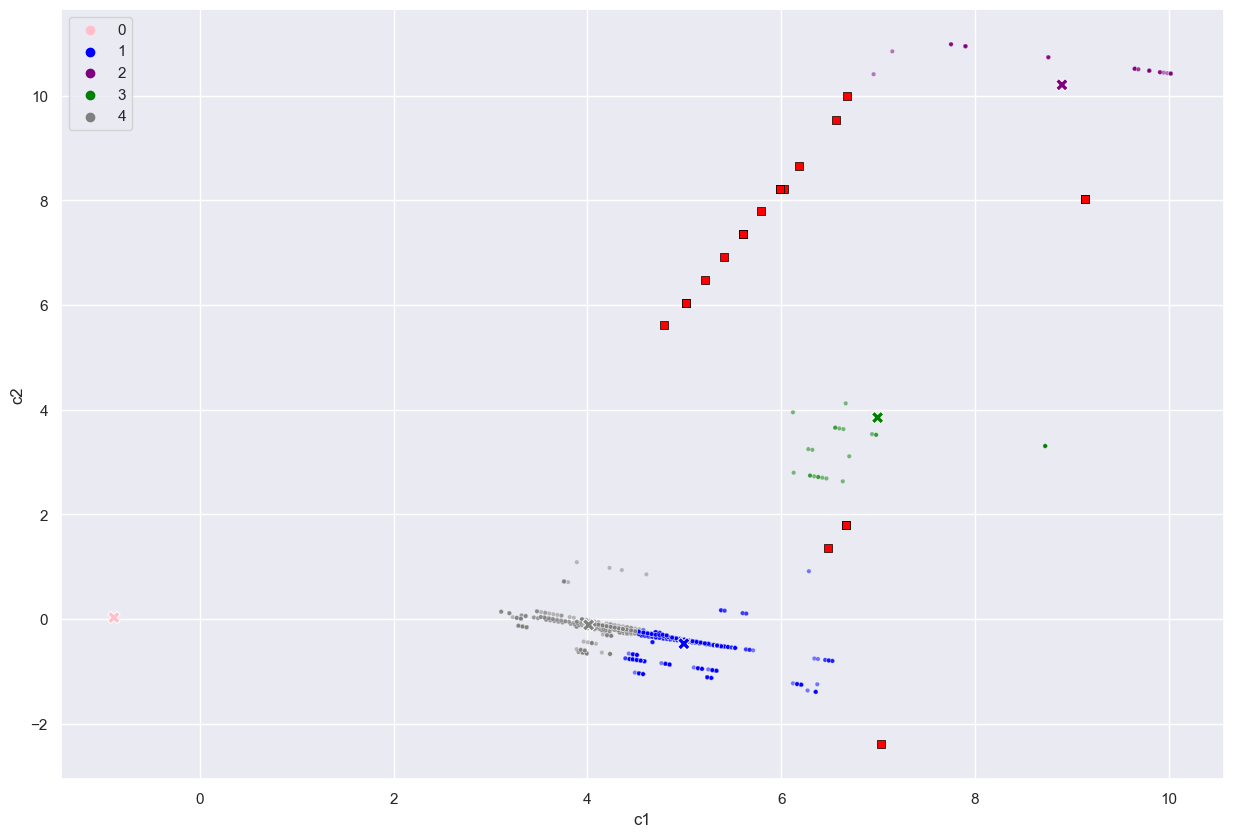

In [128]:
#pd.plotting.parallel_coordinates(X2, 'cluster')
# X -- cluster center
# s (square) = outlier
colors = ['pink', 'blue', 'purple', 'green', 'grey']
ax = sns.scatterplot(x=df['c1'], y=df['c2'], hue=kmeans.labels_, palette=colors, alpha=0.5, s=10) # hue = 'cluster'
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                     hue=range(K), palette=colors, s=80, marker='X', legend=False)

sns.scatterplot(x=x_anom, y=y_anom, color="red", s=40, marker="s", edgecolor='black' ) # candidate values for our number of cluster

plt.show()

In [129]:
df_orig = pd.read_csv(csv_file_path)
print(df_orig.head(2))
df_orig.action.astype('str')
# Use iloc to select the specific rows
selected_rows = df_orig.iloc[anomaly_indices]
selected_rows
# Filter rows where the cell value in 'action' does not start with 'Describe'
filtered_df = selected_rows.loc[~selected_rows['action'].str.startswith('Describe')]

# Printing the filtered DataFrame
filtered_df

                       time                       source            service  \
0  2018-09-25T12:06:16.000Z  vpc-flow-logs.amazonaws.com  sts.amazonaws.com   
1  2018-09-25T12:06:16.000Z  vpc-flow-logs.amazonaws.com  sts.amazonaws.com   

       action                        agent   arn            tactic1  \
0  AssumeRole  vpc-flow-logs.amazonaws.com  Null  Credential Access   
1  AssumeRole  vpc-flow-logs.amazonaws.com  Null  Credential Access   

            tactic2  
0  Lateral Movement  
1  Lateral Movement  


,time,source,service,action,agent,arn,tactic1,tactic2
21743,2018-09-30T17:30:21.000Z,223.0.113.35,signin.amazonaws.com,ConsoleLogin,AWSBFF BFFiOS/1.19.6 (1015) Mobile iOS/11.4.1 ...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21744,2018-09-29T13:58:43.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,AWSBFF BFFiOS/1.19.6 (1015) Mobile iOS/11.4.1 ...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21745,2018-09-30T19:52:25.000Z,198.18.14.103,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21746,2018-09-26T18:08:45.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21747,2018-09-27T19:17:58.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21748,2018-09-29T20:40:05.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21749,2018-09-28T16:36:10.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21750,2018-12-19T13:44:00.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (iPad; CPU OS 12_1 like Mac OS X) ...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21751,2018-12-19T20:02:32.000Z,203.0.113.55,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (iPhone; CPU iPhone OS 12_0_1 like...,arn:aws:iam::123456789012:root,Persistence,Initial Access
21752,2018-12-17T17:03:57.000Z,198.18.161.170,signin.amazonaws.com,ConsoleLogin,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,arn:aws:iam::123456789012:root,Persistence,Initial Access


#  dynamic K 

In [130]:
df_scaled = df[fields_to_encode].copy()
df_scaled[df_scaled.columns] = StandardScaler().fit_transform(df_scaled)
print(df_scaled.describe())

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
    np.sum(pca_2.explained_variance_ratio_)))

# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)

print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")

             source       service        action         agent           arn  \
count  2.567600e+04  2.567600e+04  2.567600e+04  2.567600e+04  2.567600e+04   
mean  -3.719308e-16 -5.136187e-16  5.313297e-17  3.896418e-16  5.313297e-17   
std    1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00   
min   -3.906865e+00 -3.482285e+00 -4.719854e-01 -1.326349e+01 -4.256291e-01   
25%    4.119702e-01  4.161110e-01 -3.890323e-01  3.295749e-01 -4.256291e-01   
50%    4.119702e-01  4.161110e-01 -3.890323e-01  3.295749e-01 -4.256291e-01   
75%    4.119702e-01  4.161110e-01 -3.890323e-01  3.295749e-01 -4.256291e-01   
max    4.119702e-01  4.161110e-01  5.749494e+00  3.295749e-01  7.870261e+00   

            tactic1       tactic2  
count  2.567600e+04  2.567600e+04  
mean  -1.062659e-16  3.542198e-17  
std    1.000019e+00  1.000019e+00  
min   -4.209699e-01 -2.351686e+00  
25%   -4.209699e-01  4.258337e-01  
50%   -4.209699e-01  4.258337e-01  
75%   -4.209699e-01  4.258337e-01  


In [131]:
print(dataset_pca)

        source   service    action     agent       arn   tactic1   tactic2
PC_1  0.384023  0.383368  0.370484  0.325645  0.393317  0.391062  0.393224
PC_2  0.108630  0.310996  0.050482  0.922003  0.126010  0.032910  0.147926


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 2} Score 0.9586624826425918


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 3} Score 0.9642327545639617


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 4} Score 0.9171876195132868


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 5} Score 0.9270906295775991


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 10} Score 0.9367594471144404


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 15} Score 0.9384798017441439


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 20} Score 0.9425183035531296


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 25} Score 0.9455162552657197


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 30} Score 0.9488829148727792


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 35} Score 0.9506057073637943


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 40} Score 0.9532621686188248


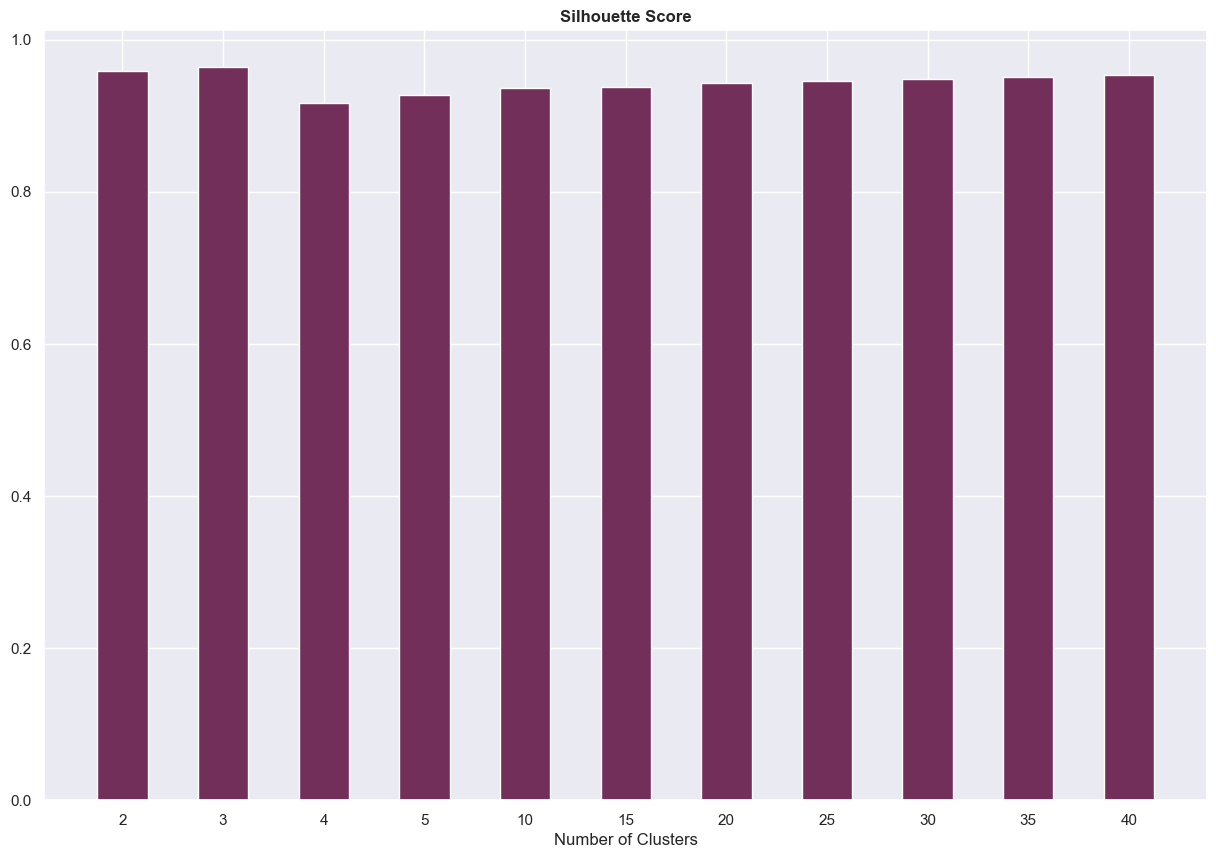

3


In [132]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(df_scaled)          # fit model on wine dataset, this will find clusters based on parameter p

    ss = metrics.silhouette_score(df_scaled, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores

    print('Parameter:', p, 'Score', ss)

    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

optimum_num_clusters = best_grid['n_clusters']
print(best_grid['n_clusters'])

###we are reusing some variable names here rerun notebook

In [133]:
 # fitting KMeans
kmeans_n = KMeans(n_clusters=optimum_num_clusters)
kmeans_n.fit(df_scaled)
centroids = kmeans_n.cluster_centers_
centroids_pca = pca_2.transform(centroids)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [134]:
print("Optimum number of clusters= "+ str(optimum_num_clusters))

Optimum number of clusters= 3


C:\Users\user\AppData\Local\Temp\2\ipykernel_4788\2407645304.py:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.scatterplot(x=x, y=y, hue=kmeans_n.labels_, palette=colors2, alpha=0.5, s=200)
C:\Users\user\AppData\Local\Temp\2\ipykernel_4788\2407645304.py:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.scatterplot(x=kmeans_n.cluster_centers_[:,0], y=kmeans_n.cluster_centers_[:,1],


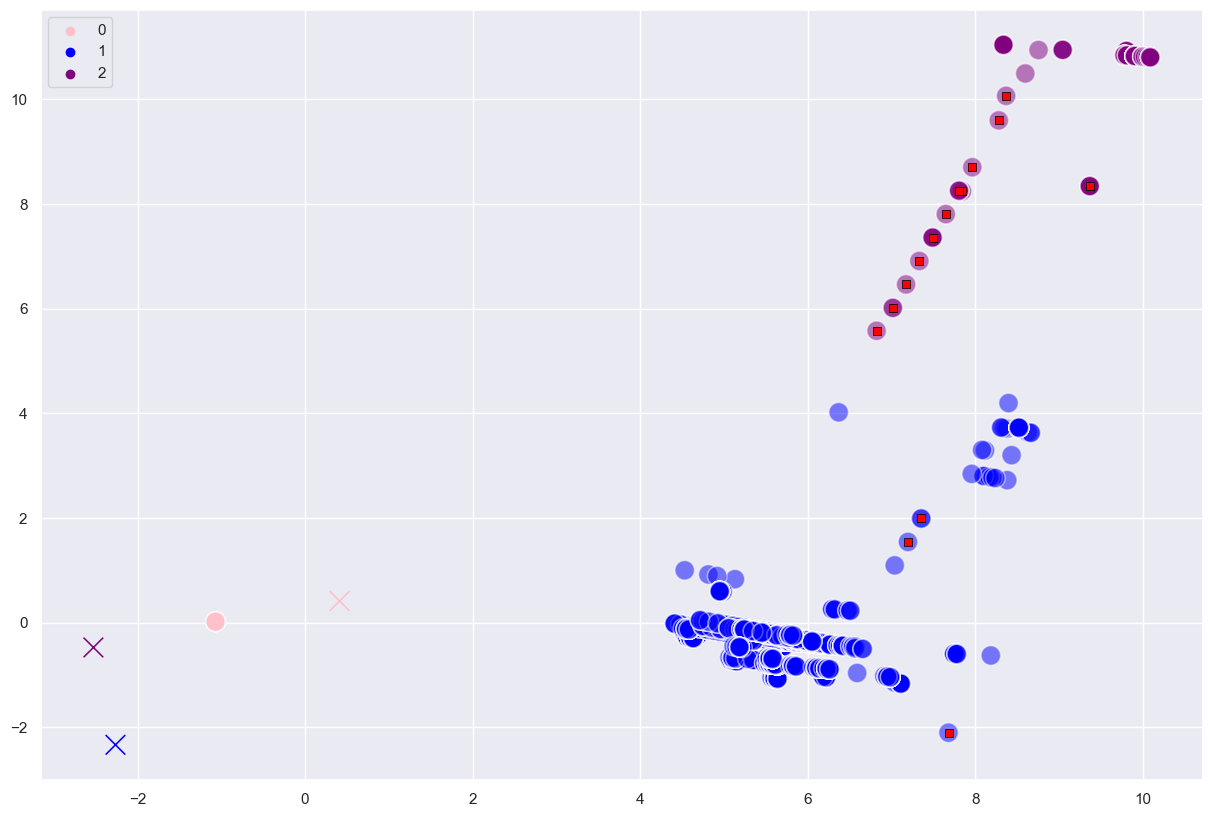

In [135]:
x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

x_anom = pca_2_result[anomaly_indices,0]
y_anom = pca_2_result[anomaly_indices,1]

colors2 = ['pink', 'blue', 'purple', 'green', 'grey']

ax = sns.scatterplot(x=x, y=y, hue=kmeans_n.labels_, palette=colors2, alpha=0.5, s=200) 
ax = sns.scatterplot(x=kmeans_n.cluster_centers_[:,0], y=kmeans_n.cluster_centers_[:,1],
                      #x=centroids_pca[:, 0], y=centroids_pca[:, 1], 
                     hue=range(optimum_num_clusters), 
                     palette=colors2, marker='x', s=200, linewidths=1.5, legend=False) # s is square 
sns.scatterplot(x=x_anom, y=y_anom, color="red", s=40, marker="s", edgecolor='black'  )# candidate values for our number of cluster

plt.show()

In [136]:
df_scaled.head(20)

,source,service,action,agent,arn,tactic1,tactic2
0,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
1,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
2,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
3,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
4,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
5,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
6,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
7,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
8,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
9,0.41197,0.416111,-0.389032,0.329575,-0.425629,-0.42097,0.425834
